In [91]:
import numpy as np #linearna algebra
import pandas as pd #obrada podataka
import matplotlib.pyplot as plt #vizualizacija
import seaborn as sns #vizualizacija

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
data = pd.read_csv('data/drug200.csv', header=None);
data.columns = data.iloc[0]
data = data.drop(data.index[0])
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,DrugY


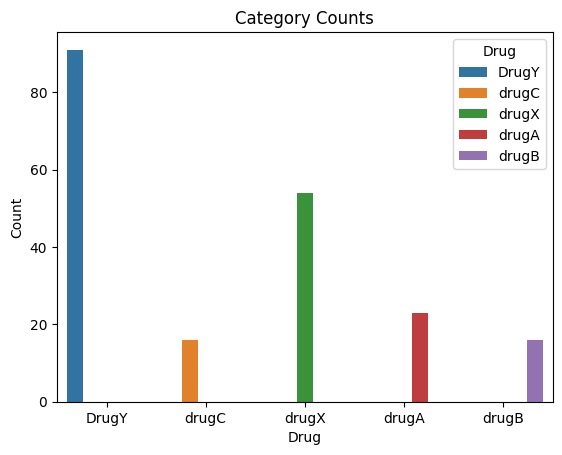

In [93]:
sns.countplot(x='Drug',data=data,hue='Drug')

plt.title("Category Counts")
plt.ylabel("Count")
plt.show()

In [94]:
for column in data.columns:
    if data[column].nunique() <= 10:
        print(f"column name: {column}, its unique values: {data[column].unique()}")

column name: Sex, its unique values: ['F' 'M']
column name: BP, its unique values: ['HIGH' 'LOW' 'NORMAL']
column name: Cholesterol, its unique values: ['HIGH' 'NORMAL']
column name: Drug, its unique values: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [95]:
# Change the string values of the columns to numbers
data['Sex'] = data['Sex'].replace({'F': 0, 'M': 1})
data['BP'] = data['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Cholesterol'] = data['Cholesterol'].replace({'HIGH': 1, 'NORMAL': 0})

In [96]:
y = data["Drug"]
X = data.drop(columns="Drug")

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=32)

In [98]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_scores = nb.predict(X_test)

print(f'Naive Bayes classifier test accuracy = {nb.score(X_test,y_test)}')

Naive Bayes classifier test accuracy = 0.8


In [99]:
from sklearn.inspection import permutation_importance

result = permutation_importance(nb, X_test, y_test, n_repeats=10, random_state=42)
for i, feature_name in enumerate(X_test.columns):
    importance_score = result.importances_mean[i]
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")

Feature: Age, Importance Score: 0.12000000000000006
Feature: Sex, Importance Score: -0.006666666666666643
Feature: BP, Importance Score: 0.22833333333333342
Feature: Cholesterol, Importance Score: 0.026666666666666707
Feature: Na_to_K, Importance Score: 0.34


In [100]:
print( confusion_matrix(y_test, y_scores))
print( classification_report(y_test, y_scores))

[[21  2  2  3  0]
 [ 0  8  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0  3  0]
 [ 5  0  0  0 11]]
              precision    recall  f1-score   support

       DrugY       0.81      0.75      0.78        28
       drugA       0.80      1.00      0.89         8
       drugB       0.71      1.00      0.83         5
       drugC       0.50      1.00      0.67         3
       drugX       1.00      0.69      0.81        16

    accuracy                           0.80        60
   macro avg       0.76      0.89      0.80        60
weighted avg       0.83      0.80      0.80        60

